In [12]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from src.utils.helpers import clean_column_values
import warnings
warnings.filterwarnings('ignore')

In [13]:
DATA_FOLDER = "data/"

movies = pd.read_csv(DATA_FOLDER + "v1_movies.csv")
#movies.head()

In [14]:
languages_translation = {
    '广州话/廣州話':'Chinese',
    '日本語':'Japanese',
    'Japan':'Japanese',
    '普通话':'Chinese',
    '한국어/조선말':'Korean',
    'ภาษาไทย':'Thai',
    'हिन्दी':'Indian',
    'தமிழ்':'Indian',
    'TiếngViệt':'Vietnamese',
    'العربية':'Arabic',
    'اردو':'Indian',
    'българскиезик':'Bulgarian',
    'Pусский':'Russian',
    'беларускаямова':'Belarusian',
    'Український':'Ukrainian',
    'Srpski':'Serbian',
    'Slovenčina':'Slovak',
    'Français':'French',
    'France':'French',
    'Deutsch':'German',
    'Italiano':'Italian',
    'Español':'Spanish',
    'Polski':'Polish',
    'StandardMandarin':'Chinese',
    'MandarinChinese':'Chinese',
    'Mandarin':'Chinese',
    'Português':'Portuguese',
    'StandardCantonese':'Chinese',
    'Cantonese':'Chinese',
    'suomi':'Finnish',
    'Magyar':'Hungarian',
    'Bosanski':'Bosnian',
    'svenska':'Swedish',
    'ελληνικά':'Greek',
    'Český':'Czech',
    'Dansk':'Danish',
    'Dutch':'Nederlands',
    'עִבְרִית':'Hebrew',
    'AmericanEnglish':'English',
    'Türkçe':'Turkish',
    'Tagalog':'Filipino',
    'Khmer':'Cambodian',
    'Hindi':'Indian',
    'Tamil':'Indian',
    'Telugu':'Indian',
    'Urdu':'Indian',
    'Oriya':'Indian',
    'Eesti':'Estonian',
    'Română':'Romanian',
    'Romani':'Romanian',
    'Norsk':'Norwegian',
    'No':'Norwegian',
    'Íslenska':'Icelandic',
    'Bahasaindonesia':'Indonesian',
    'Català':'Spanish',
    'Inuktitut':'Inuit',
    'Hakka':'Chinese',
    'Sicilian':'Italian',
    'Marathi':'Indian',
    'Hrvatski':'Croatian',
    'shqip':'Albanian',
    'isiZulu':'Zulu', 
    'Latviešu':'Latvian',
    'ქართული':'Georgian',
    'AustralianEnglish':'English',
    'Bahasamelayu':'Malay',
    'Lietuvi\\x9akai':'Lithuanian',
}

In [15]:
movies['languages'] = movies['languages'].apply(clean_column_values)
movies['languages'] = movies['languages'].apply(lambda x: 
    set([languages_translation.get(string, string) for string in x]) if isinstance(x, list) else x)

In [16]:
languages_exploded = movies.explode('languages')
languages_exploded = languages_exploded[languages_exploded['languages'] != '']
len(languages_exploded['languages'].unique())

146

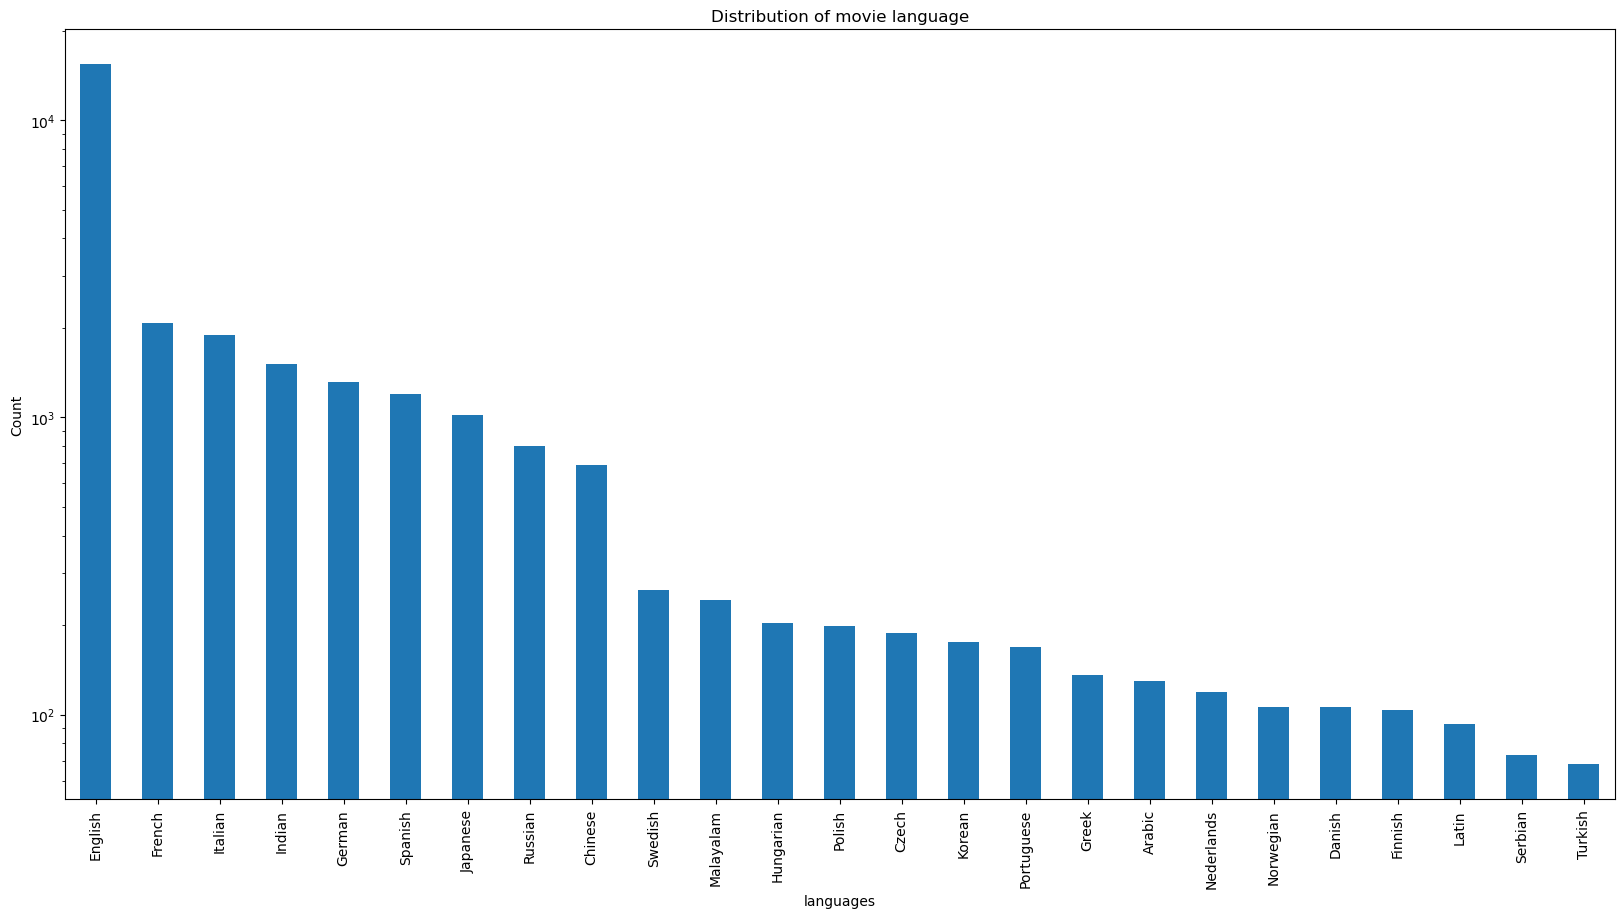

In [17]:
# Plot the distribution of movie language, for the top 25 languages
plt.figure(figsize=(20, 10))
plt.title("Distribution of movie language")
plt.xlabel("Movie language")
plt.ylabel("Count")
plt.yscale("log")
languages_exploded["languages"].value_counts().head(25).plot(kind="bar")
plt.show()

In [18]:
movies['cold_war_side'] = \
  movies['cold_war_side'].apply(lambda x: re.sub(r'[, ]+', '', x) if isinstance(x, str) else x)

western_movies = movies[movies['cold_war_side'] == 'Western']
print('Number of "Western side" movies', len(western_movies))
eastern_movies = movies[movies['cold_war_side'] == 'Eastern']
print('Number of "Eastern side" movies', len(eastern_movies))

Number of "Western side" movies 3914
Number of "Eastern side" movies 3453


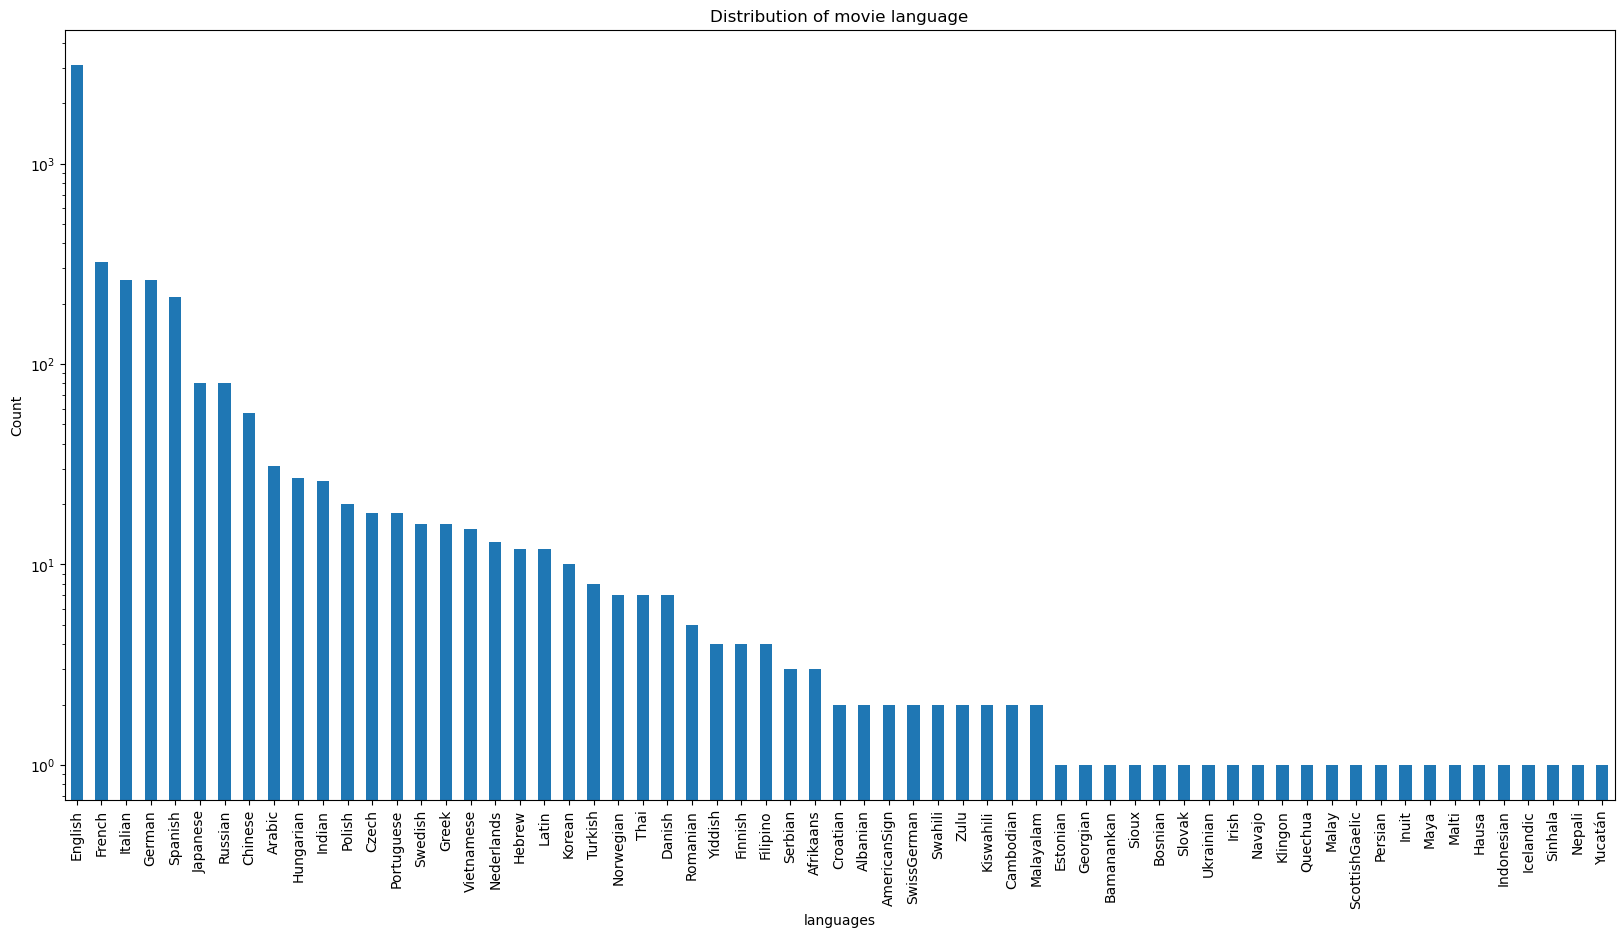

In [19]:
western_languages = western_movies.explode('languages')
western_languages = western_languages[western_languages['languages'] != '']

# Plot the distribution of movie language for western bloc, for the top 20 languages
plt.figure(figsize=(20, 10))
plt.title("Distribution of movie language")
plt.xlabel("Movie language")
plt.ylabel("Count")
western_languages["languages"].value_counts().plot(kind="bar")
plt.yscale('log')
plt.show()

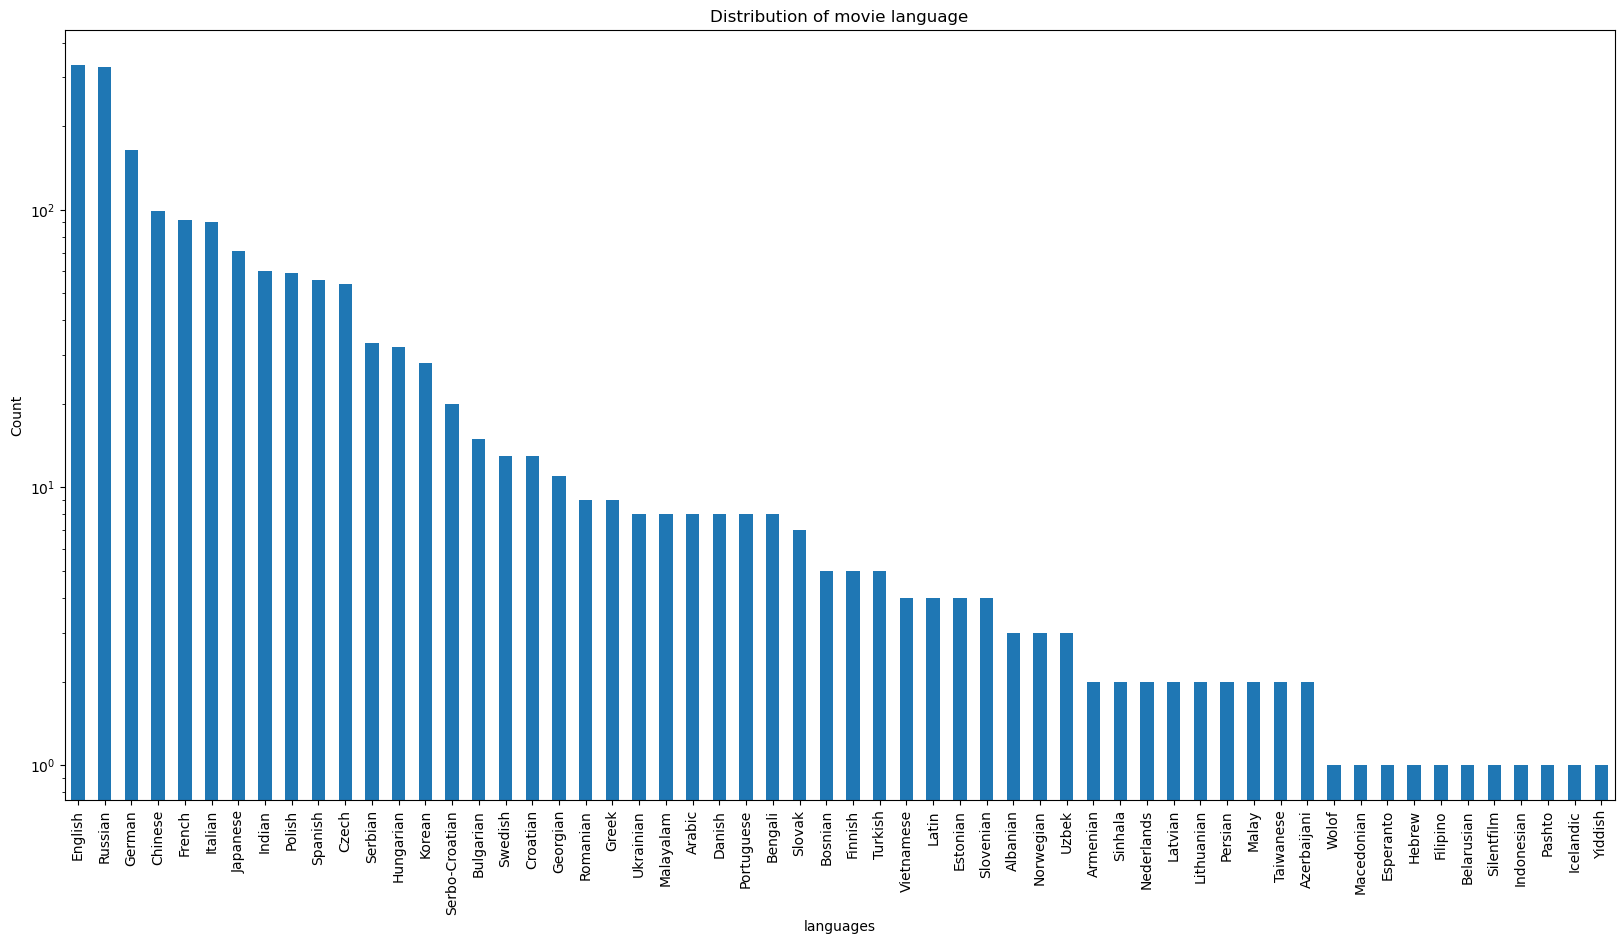

In [20]:
eastern_languages = eastern_movies.explode('languages')
eastern_languages = eastern_languages[eastern_languages['languages'] != '']
eastern_languages = eastern_languages[eastern_languages['languages'] != '??????']

# Plot the distribution of movie language for western bloc, for the top 20 languages
plt.figure(figsize=(20, 10))
plt.title("Distribution of movie language")
plt.xlabel("Movie language")
plt.ylabel("Count")
eastern_languages["languages"].value_counts().plot(kind="bar")
plt.yscale('log')
plt.show()